In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Temperature')

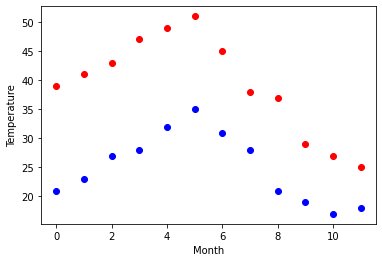

In [ ]:
max_temp = ([39,41,43,47,49,51,45,38,37,29,27,25])
min_temp = ([21,23,27,28,32,35,31,28,21,19,17,18])

months = np.arange(12)

plt.plot(months, max_temp,'ro')
plt.plot(months, min_temp,'bo')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [ ]:
#Fitting it to a periodic function
def yearly_temps(times,avg,ampl,time_offset):
  return(avg+ampl*np.cos(times+time_offset)*2*np.pi/times.max())
res_max,cov_max=optimize.curve_fit(yearly_temps,months,max_temp,[40,50,0])
res_min,cov_min=optimize.curve_fit(yearly_temps,months,min_temp,[20,10,0])


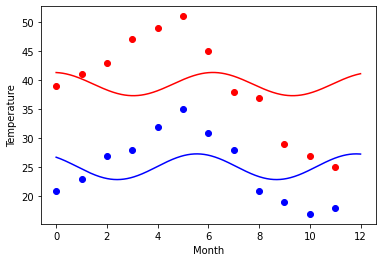

In [ ]:
#Plotting the fit
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days,yearly_temps(days, *res_max),'r-')
plt.plot(months,min_temp,'bo')
plt.plot(days,yearly_temps(days, *res_min),'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [22]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [23]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [25]:
titanic['sex'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309     True
Name: sex, Length: 1310, dtype: bool

In [26]:
sexdata = titanic.groupby(['sex']).size()
sexdata

sex
female    466
male      843
dtype: int64

In [40]:
count =[]
count.append({'sex':'male','count':sexdata.male})
count.append({'sex':'female','count':sexdata.female})
df = pd.DataFrame(count)
df = df[['sex','count']]
df
# type(df)

,sex,count
0,male,843
1,female,466


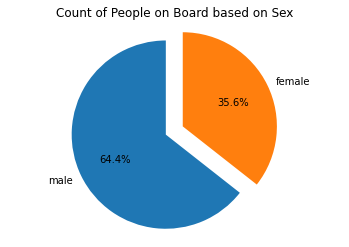

In [44]:
ax1,fig1 = plt.subplots()
fig1.pie(df['count'],explode=[0.1,0.1], labels=(df['sex']), autopct='%1.1f%%',startangle=90)
# fig1.pie(df['count'],labels = Labels)
fig1.axis('equal')
pie = plt.title("Count of People on Board based on Sex")
plt.show()

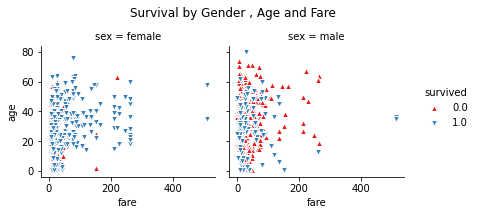

In [52]:
g = sns.FacetGrid(titanic, hue="survived", col="sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "fare", "age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');